In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
image = mpimg.imread('images/sanfran.jpg')
plt.imshow(image)

In [ ]:
thresh = (180, 255)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1
plt.imshow(binary, cmap='gray')

In [ ]:
#individual channels
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]

In [ ]:
# Plot the result
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()

ax1.imshow(R, cmap='gray')
ax1.set_title('R', fontsize=50)

ax2.imshow(G, cmap='gray')
ax2.set_title('G', fontsize=50)

ax3.imshow(B, cmap='gray')
ax3.set_title('B', fontsize=50)


plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
# The R channel does a reasonable job of highlighting the lines, 
# and you can apply a similar threshold to find lane-line pixels:

thresh = (200, 255)
r_binary = np.zeros_like(R)
r_binary[(R > thresh[0]) & (R <= thresh[1])] = 1
plt.imshow(r_binary, cmap='gray')

In [ ]:
# HLS
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
h = hls[:,:,0]
l = hls[:,:,1]
s = hls[:,:,2]

In [ ]:
# Plot the result
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()

ax1.imshow(h, cmap='gray')
ax1.set_title('h', fontsize=50)

ax2.imshow(l, cmap='gray')
ax2.set_title('l', fontsize=50)

ax3.imshow(s, cmap='gray')
ax3.set_title('s', fontsize=50)


plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
# S Channels picks lines better so apply a similar threshold to find lane-line pixels:

thresh = (90, 255)
s_binary = np.zeros_like(s)
s_binary[(s > thresh[0]) & (s <= thresh[1])] = 1
plt.imshow(s_binary, cmap='gray')

In [ ]:
# H apply threshold to h channel
thresh = (15, 100)
binary = np.zeros_like(h)
binary[(h > thresh[0]) & (h <= thresh[1])] = 1
plt.imshow(binary, cmap='gray')

In [ ]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(r_binary, cmap='gray')
ax1.set_title('R Channel Thresholded', fontsize=50)

ax2.imshow(s_binary, cmap='gray')
ax2.set_title('S Channel Thresholded', fontsize=50)


plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [2]:
# S Channel Color Threshold Function


def hls_select(img, thresh=(0, 255)):
    
    # 1) Convert to HLS color space
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    H = img[:,:,0]
    L = img[:,:,1]
    S = img[:,:,2]
    
    # 2) Apply a threshold to the S channel
    binary = np.zeros_like(S)
    binary[(S > thresh[0]) & (S <= thresh[1])] = 1

    # 3) Return a binary image of threshold result
    return binary



In [3]:
testimg = mpimg.imread('images/sanfran.jpg')
hls_binary = hls_select(testimg, thresh=(80, 200))

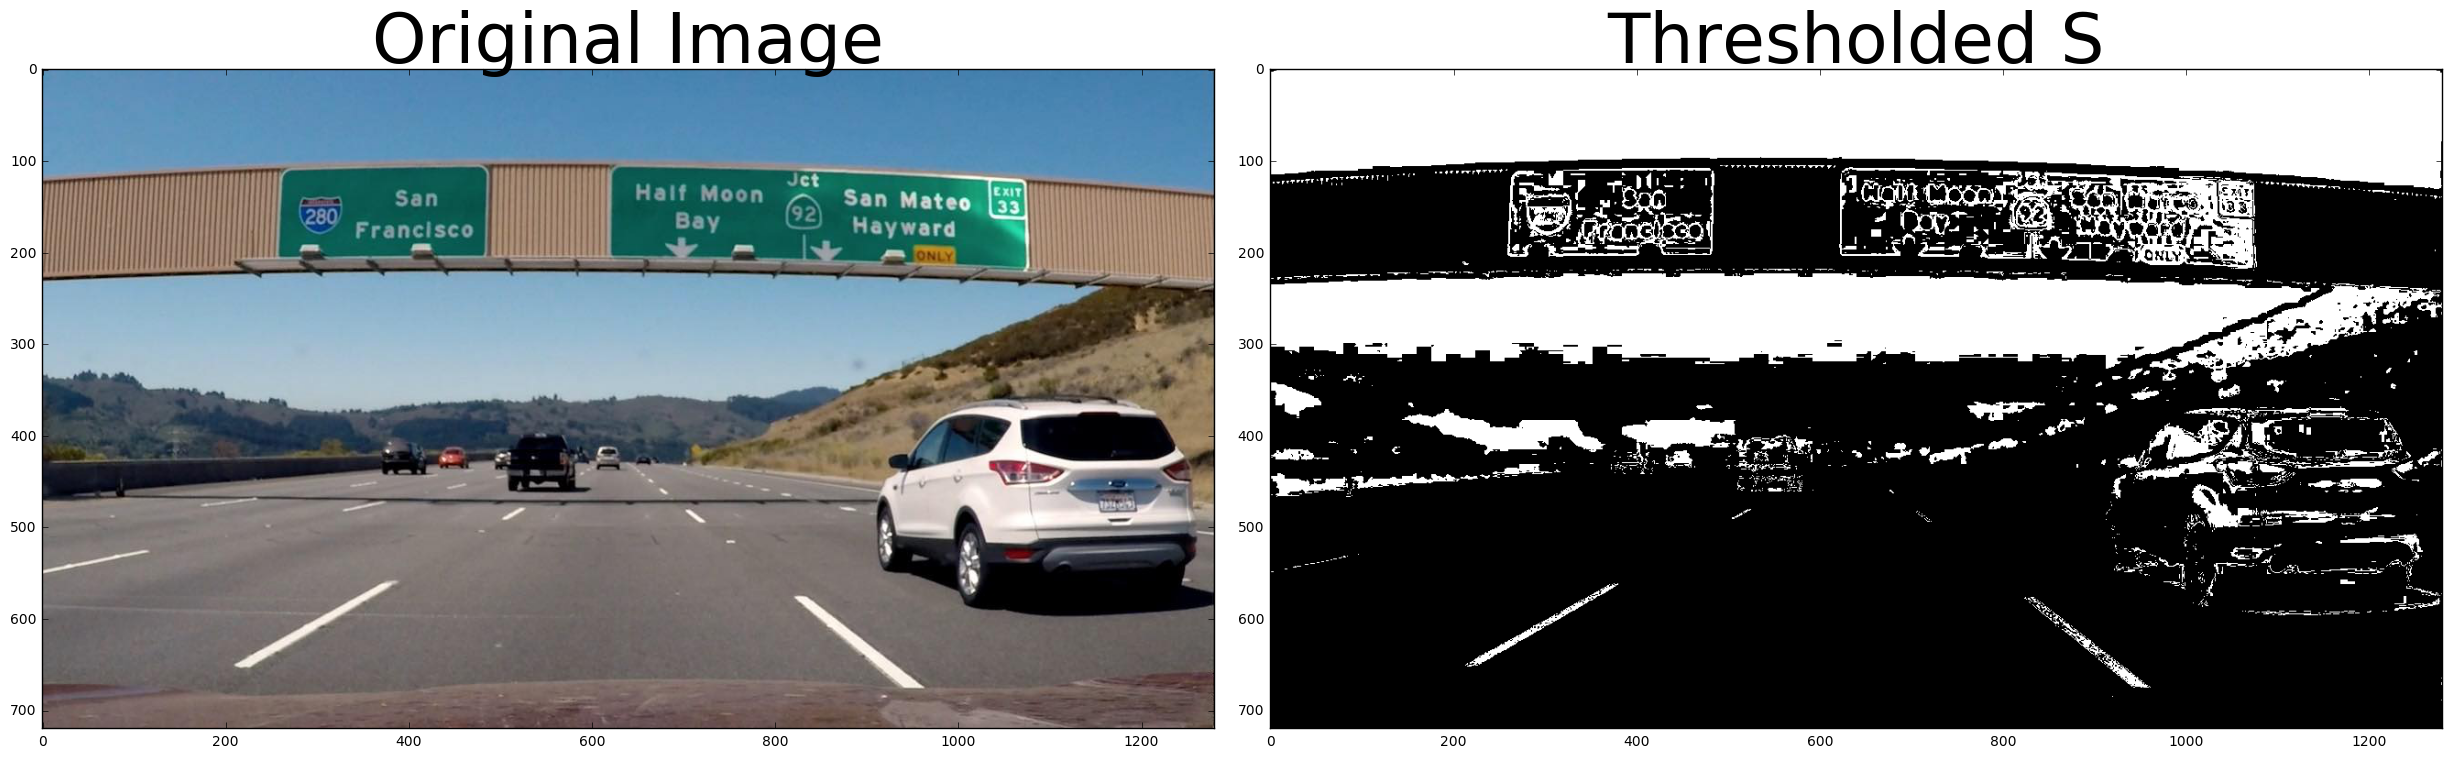

In [4]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(testimg, cmap='gray')
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('Thresholded S', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)